In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
pd.set_option('display.max_column', None)

pl=pd.read_csv('people.csv.zip')
ac=pd.read_csv('act_train.csv.zip')
pl['date']=pd.to_datetime(pl['date'])
ac['date']=pd.to_datetime(ac['date'])
pl_columns=[]
for col in pl.columns:
    if 'char' in col or 'date' in col:
        pl_columns.append('pl_' + col)
    else:
        pl_columns.append(col)
pl.columns=pl_columns
ac_columns=[]
for col in ac.columns:
    if 'char' in col or 'date' in col:
        ac_columns.append('act_' + col)
    else:
        ac_columns.append(col)
ac.columns=ac_columns
ac_pl_merge = pd.merge(ac, pl, on='people_id')
ac_pl_merge.to_csv('activity_people_merged_dataset.csv')

ac_pl_merge.head(100)

,people_id,activity_id,act_date,activity_category,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,act_char_7,act_char_8,act_char_9,act_char_10,outcome,pl_char_1,group_1,pl_char_2,pl_date,pl_char_3,pl_char_4,pl_char_5,pl_char_6,pl_char_7,pl_char_8,pl_char_9,pl_char_10,pl_char_11,pl_char_12,pl_char_13,pl_char_14,pl_char_15,pl_char_16,pl_char_17,pl_char_18,pl_char_19,pl_char_20,pl_char_21,pl_char_22,pl_char_23,pl_char_24,pl_char_25,pl_char_26,pl_char_27,pl_char_28,pl_char_29,pl_char_30,pl_char_31,pl_char_32,pl_char_33,pl_char_34,pl_char_35,pl_char_36,pl_char_37,pl_char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ppl_100025,act2_665440,2022-09-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 489,0,type 2,group 36096,type 3,2022-08-26,type 14,type 6,type 8,type 3,type 9,type 6,type 6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,76
96,ppl_100025,act2_718885,2022-11-26,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 489,0,type 2,group 36096,type 3,2022-08-26,type 14,type 6,type 8,type 3,type 9,type 6,type 6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,76
97,ppl_100025,act2_840357,2022-09-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 489,0,type 2,group 36096,type 3,2022-08-26,type 14,type 6,type 8,type 3,type 9,type 6,type 6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,76
98,ppl_100028,act2_1582813,2023-05-03,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2023-04-21,type 40,type 25,type 9,type 4,type 20,type 3,type 3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0


In [68]:
# # ac.head(20)
# pl.char_38.unique()
# pl.char_38.min() , pl.char_38.max(), pl.char_38.mean(), pl.char_38.median()

ac_pl_merge.columns
ac_pl_merge.groupby(['outcome' ])[ 'pl_char_10','pl_char_11', 'pl_char_12', 'pl_char_13',
       'pl_char_14', 'pl_char_15', 'pl_char_16', 'pl_char_17', 'pl_char_18',
       'pl_char_19', 'pl_char_20', 'pl_char_21', 'pl_char_22', 'pl_char_23',
       'pl_char_24', 'pl_char_25', 'pl_char_26', 'pl_char_27', 'pl_char_28',
       'pl_char_29', 'pl_char_30', 'pl_char_31', 'pl_char_32', 'pl_char_33',
       'pl_char_34', 'pl_char_35', 'pl_char_36', 'pl_char_37', 'pl_char_38'].count()

,pl_char_10,pl_char_11,pl_char_12,pl_char_13,pl_char_14,pl_char_15,pl_char_16,pl_char_17,pl_char_18,pl_char_19,pl_char_20,pl_char_21,pl_char_22,pl_char_23,pl_char_24,pl_char_25,pl_char_26,pl_char_27,pl_char_28,pl_char_29,pl_char_30,pl_char_31,pl_char_32,pl_char_33,pl_char_34,pl_char_35,pl_char_36,pl_char_37,pl_char_38
outcome,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794,1221794
1,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497,975497


In [69]:
# ac.loc[ac.people_id == 'ppl_100']
# pl.group_1.nunique()
ac_pl_merge.pl_char_19.value_counts()
ac_pl_merge.groupby(['pl_char_11'])[ 'outcome'].count()

pl_char_11
False    1743501
True      453790
Name: outcome, dtype: int64

In [70]:
ac_pl_merge.shape

(2197291, 55)

In [71]:
ac_pl_merge.act_char_10.notnull().sum()
ac_pl_merge.groupby('outcome')['act_char_10'].count()

outcome
0    1129010
1     910666
Name: act_char_10, dtype: int64

In [72]:
ac_pl_merge.act_char_10.value_counts()

type 1       904683
type 23      200408
type 2       116191
type 61       35417
type 452      23513
              ...  
type 6790         1
type 4721         1
type 3717         1
type 8272         1
type 4331         1
Name: act_char_10, Length: 6515, dtype: int64

<Figure size 720x360 with 0 Axes>

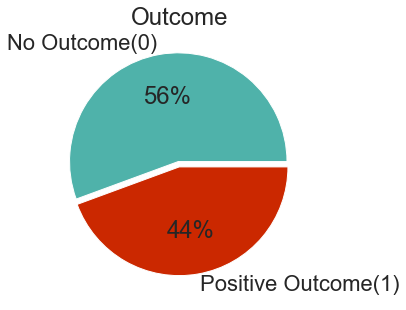

<Figure size 720x360 with 0 Axes>

In [73]:
sns.set(font_scale=2)
plt.figure(figsize=(10,5))
plt.pie(ac_pl_merge['outcome'].value_counts(),colors=[ '#4fb2aa', '#cb2800'], labels=['No Outcome(0)','Positive Outcome(1)'],autopct='%1.0f%%', explode=[0.05,0], rotatelabels=False)
plt.title('Outcome')
plt.figure(figsize=(10,5))

# plt.savefig('Listings Types')

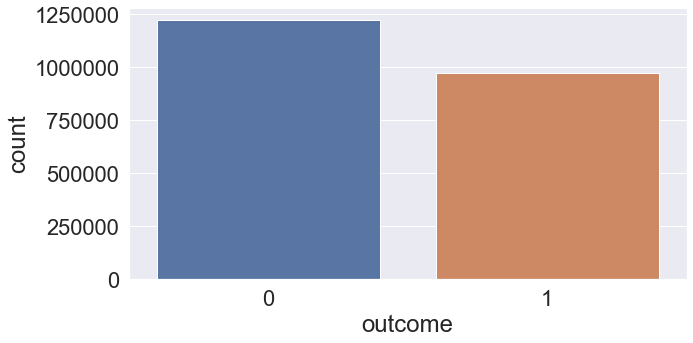

In [74]:
plt.figure(figsize=(10,5))
sns.countplot('outcome', data=ac_pl_merge)

False    1621615
True      575676
Name: pl_char_15, dtype: int64

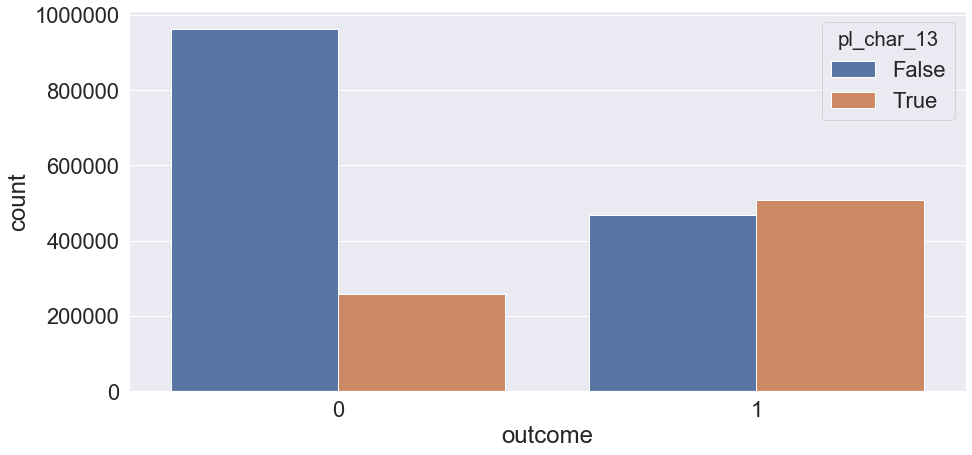

In [75]:
# pl.info()
# pl.char_38.unique()
# ac.columns
# ac.info()
plt.figure(figsize=(15,7))

ac_pl_merge.pl_char_11.value_counts()
# sns.countplot('pl_char_10', data=ac_pl_merge, hue='outcome') ,
# sns.countplot('pl_char_37', data=ac_pl_merge, hue='outcome')
sns.countplot('outcome', data=ac_pl_merge, hue='pl_char_13')

ac_pl_merge.pl_char_15.value_counts()

## Insight:

More False answers between pl_char_10 and pl_char_38 lead to more negative value. Contrarily, more True answers lead to more positive business value. 

In [76]:
ac.activity_category.unique()
ac.outcome.unique()
ac.act_date.max(), ac.act_date.min(), pl.pl_date.max(), pl.pl_date.min()
# ac.columns
# ac.act_date.head()

(Timestamp('2023-08-31 00:00:00'),
 Timestamp('2022-07-17 00:00:00'),
 Timestamp('2023-08-31 00:00:00'),
 Timestamp('2020-05-18 00:00:00'))

Text(0.5, 1.0, 'Char_38')

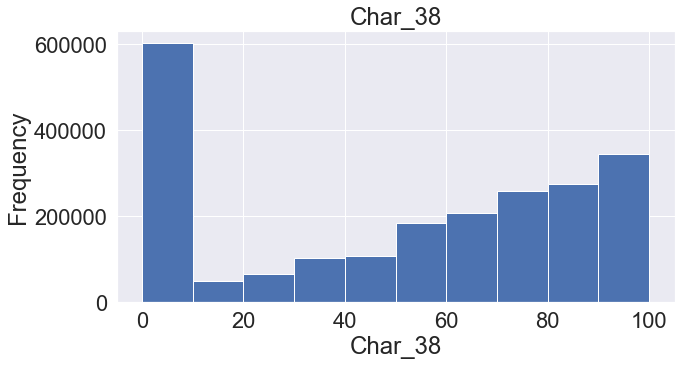

In [77]:
plt.figure(figsize=(40,7))
ac_pl_merge.pl_char_38.plot(kind='hist',figsize=(10,5))
plt.xlabel('Char_38')
plt.ylabel('Frequency')
plt.title('Char_38')

(array([587161.,  49644.,  65930., 101104.,  88821.,  66710.,  71624.,
         71876.,  54474.,  64450.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

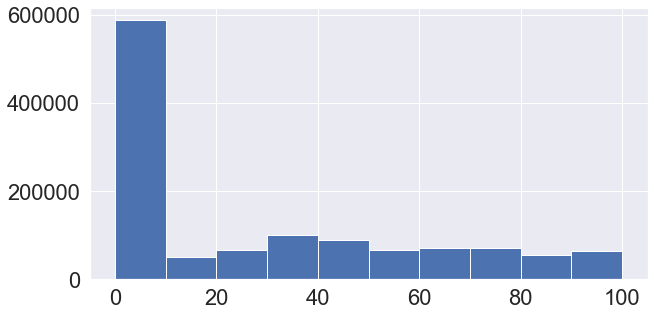

In [78]:
pl.columns
# pl_char_38=pl[['people_id', 'char_38']]
# ac_outcome=ac[['people_id', 'outcome']]
# ac_pl_38_outcome_df=pl_char_38.merge(ac_outcome, how='left', on='people_id')
ac_pl_merge_38_outcome_0 = ac_pl_merge[ac_pl_merge['outcome'] == 0]
plt.figure(figsize=(10,5))
plt.hist(ac_pl_merge_38_outcome_0['pl_char_38'])
# ac_pl_38_outcome_df_0.describe()

(array([1.50320e+04, 1.60000e+01, 0.00000e+00, 1.88000e+03, 1.79420e+04,
        1.16920e+05, 1.34997e+05, 1.87124e+05, 2.21615e+05, 2.79971e+05]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

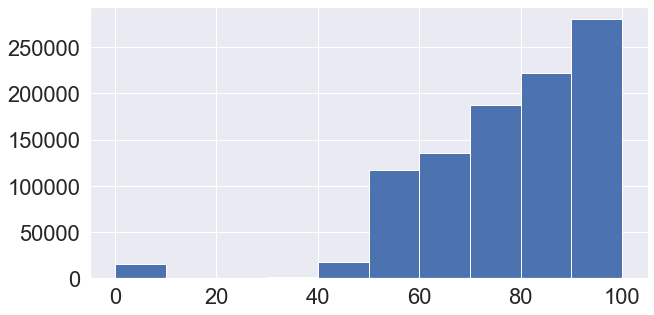

In [79]:
ac_pl_merge_38_outcome_1 = ac_pl_merge[ac_pl_merge['outcome'] == 1]
plt.figure(figsize=(10,5))
plt.hist(ac_pl_merge_38_outcome_1['pl_char_38'])
# ac_pl_38_outcome_df_1.describe()

In [80]:
# ac.memory_usage()

In [81]:
# pl.columns

In [82]:
# ac.columns

In [83]:
# ac.describe()
# ac.outcome.isnull().sum()
# for i in ac.columns:
#     i.isnull().sum()
# ac.isnull().sum() , ac.shape
# ac.shape[0] - ac.outcome.notnull().sum()
# ac.shape[0] - ac.char_1.isnull().sum()

In [84]:
# for i in ac.columns:
#     ac.columns[i],ac.shape[0] - ac[i].isnull().sum()
# ac.outcome.value_counts().plot(kind='bar')

In [85]:
for i in ac_pl_merge:
    print('Unique Elements: ', i,":",ac_pl_merge[i].nunique())
# ac.char_1.unique()

Unique Elements:  people_id : 151295
Unique Elements:  activity_id : 2197291
Unique Elements:  act_date : 411
Unique Elements:  activity_category : 7
Unique Elements:  act_char_1 : 51
Unique Elements:  act_char_2 : 32
Unique Elements:  act_char_3 : 11
Unique Elements:  act_char_4 : 7
Unique Elements:  act_char_5 : 7
Unique Elements:  act_char_6 : 5
Unique Elements:  act_char_7 : 8
Unique Elements:  act_char_8 : 18
Unique Elements:  act_char_9 : 19
Unique Elements:  act_char_10 : 6515
Unique Elements:  outcome : 2
Unique Elements:  pl_char_1 : 2
Unique Elements:  group_1 : 29899
Unique Elements:  pl_char_2 : 3
Unique Elements:  pl_date : 1196
Unique Elements:  pl_char_3 : 43
Unique Elements:  pl_char_4 : 25
Unique Elements:  pl_char_5 : 9
Unique Elements:  pl_char_6 : 7
Unique Elements:  pl_char_7 : 25
Unique Elements:  pl_char_8 : 8
Unique Elements:  pl_char_9 : 9
Unique Elements:  pl_char_10 : 2
Unique Elements:  pl_char_11 : 2
Unique Elements:  pl_char_12 : 2
Unique Elements:  pl_cha

In [86]:
# for i in pl:
#     print('Unique Elements: ', i,":",pl[i].nunique())

In [87]:
for i in ac_pl_merge:
    print('No. of Null', i,":",ac_pl_merge[i].isnull().sum())

No. of Null people_id : 0
No. of Null activity_id : 0
No. of Null act_date : 0
No. of Null activity_category : 0
No. of Null act_char_1 : 2039676
No. of Null act_char_2 : 2039676
No. of Null act_char_3 : 2039676
No. of Null act_char_4 : 2039676
No. of Null act_char_5 : 2039676
No. of Null act_char_6 : 2039676
No. of Null act_char_7 : 2039676
No. of Null act_char_8 : 2039676
No. of Null act_char_9 : 2039676
No. of Null act_char_10 : 157615
No. of Null outcome : 0
No. of Null pl_char_1 : 0
No. of Null group_1 : 0
No. of Null pl_char_2 : 0
No. of Null pl_date : 0
No. of Null pl_char_3 : 0
No. of Null pl_char_4 : 0
No. of Null pl_char_5 : 0
No. of Null pl_char_6 : 0
No. of Null pl_char_7 : 0
No. of Null pl_char_8 : 0
No. of Null pl_char_9 : 0
No. of Null pl_char_10 : 0
No. of Null pl_char_11 : 0
No. of Null pl_char_12 : 0
No. of Null pl_char_13 : 0
No. of Null pl_char_14 : 0
No. of Null pl_char_15 : 0
No. of Null pl_char_16 : 0
No. of Null pl_char_17 : 0
No. of Null pl_char_18 : 0
No. of N

In [88]:
# for i in pl:
#     print('No. of Null', i,pl[i].isnull().sum())    #All good, no missing values

In [89]:
# ac.activity_category.unique()
# ac.char_1.value_counts()
# ac.columns

In [90]:
ac_pl_merge.columns

Index(['people_id', 'activity_id', 'act_date', 'activity_category',
       'act_char_1', 'act_char_2', 'act_char_3', 'act_char_4', 'act_char_5',
       'act_char_6', 'act_char_7', 'act_char_8', 'act_char_9', 'act_char_10',
       'outcome', 'pl_char_1', 'group_1', 'pl_char_2', 'pl_date', 'pl_char_3',
       'pl_char_4', 'pl_char_5', 'pl_char_6', 'pl_char_7', 'pl_char_8',
       'pl_char_9', 'pl_char_10', 'pl_char_11', 'pl_char_12', 'pl_char_13',
       'pl_char_14', 'pl_char_15', 'pl_char_16', 'pl_char_17', 'pl_char_18',
       'pl_char_19', 'pl_char_20', 'pl_char_21', 'pl_char_22', 'pl_char_23',
       'pl_char_24', 'pl_char_25', 'pl_char_26', 'pl_char_27', 'pl_char_28',
       'pl_char_29', 'pl_char_30', 'pl_char_31', 'pl_char_32', 'pl_char_33',
       'pl_char_34', 'pl_char_35', 'pl_char_36', 'pl_char_37', 'pl_char_38'],
      dtype='object')

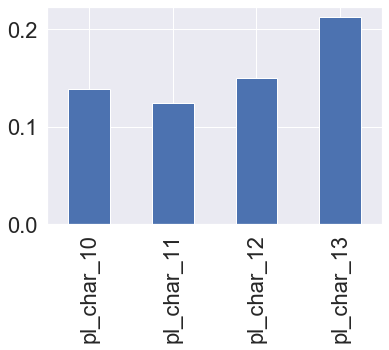

In [91]:
outcome_1 = ac_pl_merge[ac_pl_merge['outcome'] == 1]
outcome_0 = ac_pl_merge[ac_pl_merge['outcome'] == 0]

# ac_pl_merge[outcome_1][['pl_char_10']].mean()
ac_pl_merge.loc[ac_pl_merge['outcome'] == 0, :][['pl_char_10', 'pl_char_11', 'pl_char_12', 'pl_char_13',
       ]].mean().plot(kind='bar')


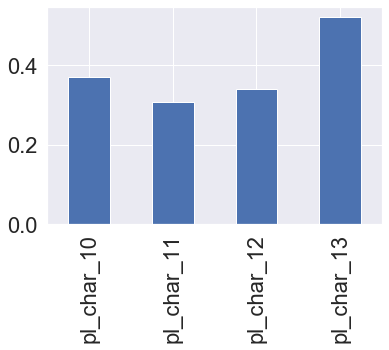

In [92]:
ac_pl_merge.loc[ac_pl_merge['outcome'] == 1, :][['pl_char_10', 'pl_char_11', 'pl_char_12', 'pl_char_13'
 ]].mean().plot(kind='bar')

In [93]:
ac_pl_merge.loc[ac_pl_merge['outcome'] == 0, :][['pl_char_10', 'pl_char_11', 'pl_char_12', 'pl_char_13','pl_char_14', 'pl_char_15', 'pl_char_16', 'pl_char_17', 'pl_char_18',
       'pl_char_19', 'pl_char_20', 'pl_char_21', 'pl_char_22', 'pl_char_23',
       'pl_char_24', 'pl_char_25', 'pl_char_26', 'pl_char_27', 'pl_char_28',
       'pl_char_29', 'pl_char_30', 'pl_char_31', 'pl_char_32', 'pl_char_33',
       'pl_char_34', 'pl_char_35', 'pl_char_36', 'pl_char_37', 'pl_char_38'
       ]].mean()

pl_char_10     0.138419
pl_char_11     0.124681
pl_char_12     0.149603
pl_char_13     0.212266
pl_char_14     0.158686
pl_char_15     0.158280
pl_char_16     0.157953
pl_char_17     0.164649
pl_char_18     0.105264
pl_char_19     0.160178
pl_char_20     0.110510
pl_char_21     0.158201
pl_char_22     0.155879
pl_char_23     0.174840
pl_char_24     0.104651
pl_char_25     0.197717
pl_char_26     0.110502
pl_char_27     0.144676
pl_char_28     0.161415
pl_char_29     0.101111
pl_char_30     0.127994
pl_char_31     0.167970
pl_char_32     0.157622
pl_char_33     0.135915
pl_char_34     0.212560
pl_char_35     0.124272
pl_char_36     0.195533
pl_char_37     0.155955
pl_char_38    28.166647
dtype: float64

In [94]:
ac_pl_merge.loc[ac_pl_merge['outcome'] == 1, :][['pl_char_10', 'pl_char_11', 'pl_char_12', 'pl_char_13','pl_char_14', 'pl_char_15', 'pl_char_16', 'pl_char_17', 'pl_char_18',
       'pl_char_19', 'pl_char_20', 'pl_char_21', 'pl_char_22', 'pl_char_23',
       'pl_char_24', 'pl_char_25', 'pl_char_26', 'pl_char_27', 'pl_char_28',
       'pl_char_29', 'pl_char_30', 'pl_char_31', 'pl_char_32', 'pl_char_33',
       'pl_char_34', 'pl_char_35', 'pl_char_36', 'pl_char_37', 'pl_char_38'
       ]].mean()

pl_char_10     0.370080
pl_char_11     0.309027
pl_char_12     0.341508
pl_char_13     0.521318
pl_char_14     0.375931
pl_char_15     0.391894
pl_char_16     0.406422
pl_char_17     0.423834
pl_char_18     0.267851
pl_char_19     0.410240
pl_char_20     0.331828
pl_char_21     0.406867
pl_char_22     0.411181
pl_char_23     0.421092
pl_char_24     0.276095
pl_char_25     0.468417
pl_char_26     0.240544
pl_char_27     0.344571
pl_char_28     0.410139
pl_char_29     0.240844
pl_char_30     0.298769
pl_char_31     0.394350
pl_char_32     0.406249
pl_char_33     0.311975
pl_char_34     0.512683
pl_char_35     0.297846
pl_char_36     0.494511
pl_char_37     0.414715
pl_char_38    77.302018
dtype: float64

In [95]:
ac_pl_merge.columns

Index(['people_id', 'activity_id', 'act_date', 'activity_category',
       'act_char_1', 'act_char_2', 'act_char_3', 'act_char_4', 'act_char_5',
       'act_char_6', 'act_char_7', 'act_char_8', 'act_char_9', 'act_char_10',
       'outcome', 'pl_char_1', 'group_1', 'pl_char_2', 'pl_date', 'pl_char_3',
       'pl_char_4', 'pl_char_5', 'pl_char_6', 'pl_char_7', 'pl_char_8',
       'pl_char_9', 'pl_char_10', 'pl_char_11', 'pl_char_12', 'pl_char_13',
       'pl_char_14', 'pl_char_15', 'pl_char_16', 'pl_char_17', 'pl_char_18',
       'pl_char_19', 'pl_char_20', 'pl_char_21', 'pl_char_22', 'pl_char_23',
       'pl_char_24', 'pl_char_25', 'pl_char_26', 'pl_char_27', 'pl_char_28',
       'pl_char_29', 'pl_char_30', 'pl_char_31', 'pl_char_32', 'pl_char_33',
       'pl_char_34', 'pl_char_35', 'pl_char_36', 'pl_char_37', 'pl_char_38'],
      dtype='object')

In [96]:
ac_pl_merge.loc[ac_pl_merge['outcome'] == 1, :].shape
ac_pl_merge.loc[ac_pl_merge['outcome'] == 0, :].shape

(1221794, 55)

In [97]:
ac_pl_merge[outcome_1][['pl_char_10', 'pl_char_11', 'pl_char_12', 'pl_char_13',
       'pl_char_14', 'pl_char_15', 'pl_char_16', 'pl_char_17', 'pl_char_18',
       'pl_char_19', 'pl_char_20', 'pl_char_21', 'pl_char_22', 'pl_char_23',
       'pl_char_24', 'pl_char_25', 'pl_char_26', 'pl_char_27', 'pl_char_28',
       'pl_char_29', 'pl_char_30', 'pl_char_31', 'pl_char_32', 'pl_char_33',
       'pl_char_34', 'pl_char_35', 'pl_char_36', 'pl_char_37']].mean()

ValueError: Must pass DataFrame with boolean values only

In [ ]:
ac_pl_merge.groupby('outcome')['act_char_1','act_char_2', 'act_char_3', 'act_char_4', 'act_char_5', 'act_char_6', 'act_char_7', 'act_char_8',
       'act_char_9', 'act_char_10'].count()

In [ ]:
ac_pl_merge.groupby(['outcome','activity_category'])['act_char_1','act_char_2', 'act_char_3', 'act_char_4', 'act_char_5', 'act_char_6', 'act_char_7', 'act_char_8',
       'act_char_9', 'act_char_10'].count()

In [ ]:
ac_pl_merge_perc = ac_pl_merge.groupby(['activity_category','outcome'])['act_char_1','act_char_2', 'act_char_3', 'act_char_4', 'act_char_5', 'act_char_6', 'act_char_7', 'act_char_8',
       'act_char_9', 'act_char_10'].count().reset_index()
ac_pl_merge_perc['act_total'] = ac_pl_merge_perc['act_char_9'] + ac_pl_merge_perc['act_char_10']
ac_pl_merge_perc

In [ ]:
plt.figure(figsize=(15,7))

sns.barplot('activity_category', 'act_total', data=ac_pl_merge_perc, ci=False, hue='outcome')

In [ ]:
ac_pl_merge_perc = ac_pl_merge.groupby(['activity_category','outcome'])['act_char_9', 'act_char_10'].count().reset_index()
ac_pl_merge_perc[]

In [ ]:
# ac_pl_merge_perc['percentage'] = ac_pl_merge_perc
new_col=[]
if 

In [ ]:
ac_pl_merge.outcome.value_counts()

In [115]:
type_outcome = ac_pl_merge.groupby(['activity_category','outcome'])['people_id'].count().reset_index()
type_outcome.columns=['activity_category','outcome','count']
type_outcome

,activity_category,outcome,count
0,type 1,0,92784
1,type 1,1,64831
2,type 2,0,443002
3,type 2,1,461681
4,type 3,0,321202
5,type 3,1,108206
6,type 4,0,105972
7,type 4,1,101493
8,type 5,0,255050
9,type 5,1,235660


## Hypothesis Testings 

H0: There is no difference in the mean of pl_char_38 with respect to  postive outcomes(business value) and no outcome 
H1: There is a difference in  the mean of pl_char_38 with respec to  postive outcomes(business value) and no outcome (Claim)

In [112]:
ac_pl_merge_0 = ac_pl_merge['outcome'] == 0
ac_pl_merge_1 = ac_pl_merge['outcome'] == 1
ac_pl_merge[ac_pl_merge_1].columns
stats.ttest_ind(ac_pl_merge[ac_pl_merge_0]['pl_char_38'], ac_pl_merge[ac_pl_merge_1]['pl_char_38'], equal_var=False)

Ttest_indResult(statistic=-1446.7458801234332, pvalue=0.0)

Decision: There is enough evidance to reject the null hypothesis, that there is no difference in the mean of pl_char_38 with respect to  postive outcomes(business value) and no outcome

In [111]:
stats.ttest_ind(ac_pl_merge[ac_pl_merge_0]['pl_char_37'], ac_pl_merge[ac_pl_merge_1]['pl_char_37'], equal_var=False)

Ttest_indResult(statistic=-433.34072072117186, pvalue=0.0)

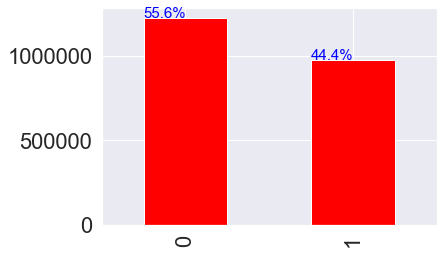

In [113]:
ax=ac_pl_merge.outcome.value_counts().plot(kind='bar', color='red')
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()-.0, i.get_height()+5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='blue')

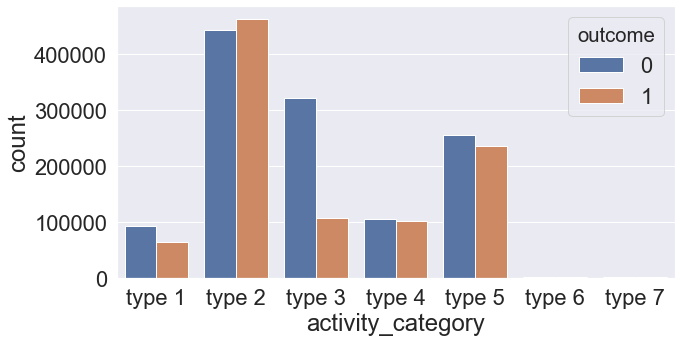

In [116]:
# ac.groupby(['activity_category','outcome'])['people_id'].count().reset_index().plot(kind='bar', stacked=True)
# ac.groupby(['activity_category'])['outcome'].count().reset_index().plot(kind='bar')
plt.figure(figsize=(10,5))
sns.barplot('activity_category', 'count', data=type_outcome, ci=False, hue='outcome')

## Insight:

Type2 and type5 activities have higher probablity to give a positive outcome(business value) compared to remaining five activities. However, type3 activity has the highest probablity of giving a negative outcome(business value). 

In [117]:
ac_pl_merge['activity_category'].value_counts()
ac_pl_merge_type2 = ac_pl_merge[ac_pl_merge['activity_category'] == 'type 2']
ac_pl_merge_type2.outcome.value_counts()

1    461681
0    443002
Name: outcome, dtype: int64

In [ ]:
ac_pl_merge_type2.outcome.plot(kind='bar')

In [ ]:
# plt.figure(figsize=(10,5))
# sns.countplot('activity_category', data=ac_pl_merge, hue='outcome')

In [ ]:
# sns.barplot('activity_category', 'people_id', data=type_outcome, ci=False,  hue='outcome',stacked=True)
# type_outcome.plot(kind='bar', stacked=True)
plt.figure(figsize=(10,5))
sns.barplot('outcome', 'count', data=type_outcome, ci=False, hue='activity_category')

In [ ]:
# ac_pl_merge.groupby(['activity_category','outcome'])['act_char_1',
#        'act_char_2', 'act_char_3', 'act_char_4', 'act_char_5', 'act_char_6', 'act_char_7', 'act_char_8',
#        'act_char_9', 'act_char_10'].count()

In [ ]:
pl.head(1)

In [ ]:
# # ac[ac.people_id.value_counts().head(32).reset_index()['index']]
# repeated_customer=ac_pl_merge.people_id.value_counts().head(500).reset_index()
# # ac.loc[ac.people_id == ac[ac.people_id.value_counts().head(32).reset_index()['index']]]
# # mask1= ac[ac['people_id'] == ac.people_id.value_counts().head(32).reset_index().head(1)['index']]
# # ac.loc[ac.people_id == ac.people_id.value_counts().head(32).reset_index().head(1)['index'],:]
# repeated_customer.people_id.sum()
# # for i in mask:
# #     if i in ac['people_id']:
# #         print(ac[i])
# ac_pl_merge.loc[ac_pl_merge.people_id == "ppl_247868",]['outcome'].value_counts()

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot('outcome', 'pl_char_38', data=ac_pl_merge, hue='outcome', orient='v')

In [ ]:
import statsmodels.api as sm 
sm.qqplot(ac_pl_merge['pl_char_38']) 


In [ ]:
# customer_count = ac_pl_merge.people_id.value_counts().reset_index()
# customer_count.columns=['cust_id', 'No_act']
# customer_count.shape[0]
# one_time_customer = customer_count[customer_count['No_act'] < 2].count()
# repeated_customer = customer_count[customer_count['No_act'] > 1].count()
# one_time_customer, repeated_customer

In [ ]:
# pl_month_count = ac_pl_merge.pl_date.dt.month.value_counts().sort_values().reset_index().sort_values('index')
# pl_month_count.columns=['month', 'count']
# sns.barplot('month', 'count', data=pl_month_count)

In [ ]:
# ac_month_count = ac_pl_merge.act_date.dt.month.value_counts().sort_values().reset_index().sort_values('index')
# ac_month_count.columns=['month', 'count']
# sns.barplot('month', 'count', data=ac_month_count)

In [ ]:
df_outcome_1=ac_pl_merge[ac_pl_merge['outcome'] == 1]
df_outcome_1.shape
df_outcome_0=ac_pl_merge[ac_pl_merge['outcome'] == 0]
df_outcome_0.shape


In [ ]:
df_outcome_1_month_count = df_outcome_1.act_date.dt.month.value_counts().sort_values().reset_index().sort_values('index')
df_outcome_1_month_count.columns=['month', 'count']
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
              7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
plt.figure(figsize=(30,7))
df_outcome_1_month_count.month = df_outcome_1_month_count.month.replace(month_map)
sns.barplot('month', 'count', data=df_outcome_1_month_count)
plt.title('Successfull Outcome by Month')

In [ ]:
df_outcome_0_month_count = df_outcome_0.act_date.dt.month.value_counts().sort_values().reset_index().sort_values('index')
df_outcome_0_month_count.columns=['month', 'count']
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
              7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
plt.figure(figsize=(30,7))
df_outcome_0_month_count.month = df_outcome_0_month_count.month.replace(month_map)
sns.barplot('month', 'count', data=df_outcome_0_month_count)
plt.title('Failed Outcome by Month')

In [ ]:
df_outcome_weekday_count = ac_pl_merge.act_date.dt.weekday.value_counts().sort_values().reset_index().sort_values('index') # Sunday is 0.
df_outcome_weekday_count.columns=['weekday', 'count']
# df_outcome_1_weekday_count.weekday.replace(0,'Monday')
weekday_map = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
df_outcome_weekday_count.weekday = df_outcome_weekday_count.weekday.replace(weekday_map)
plt.figure(figsize=(15,7))
sns.barplot('weekday', 'count', data=df_outcome_weekday_count)
plt.xticks(rotation = 45)
plt.title('Outcome by Weekday')

In [ ]:
df_outcome_1_weekday_count = df_outcome_1.act_date.dt.weekday.value_counts().sort_values().reset_index().sort_values('index') # Sunday is 0.
df_outcome_1_weekday_count.columns=['weekday', 'count']
# df_outcome_1_weekday_count.weekday.replace(0,'Monday')
weekday_map = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
df_outcome_1_weekday_count.weekday = df_outcome_1_weekday_count.weekday.replace(weekday_map)
plt.figure(figsize=(15,7))
sns.barplot('weekday', 'count', data=df_outcome_1_weekday_count)
plt.xticks(rotation = 45)
plt.title('Successfull Outcome by Weekday')
# df_outcome_1_weekday_count

In [ ]:
df_outcome_0_weekday_count = df_outcome_0.act_date.dt.weekday.value_counts().sort_values().reset_index().sort_values('index') # Sunday is 0.
df_outcome_0_weekday_count.columns=['weekday', 'count']
# df_outcome_1_weekday_count.weekday.replace(0,'Monday')
weekday_map = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
df_outcome_0_weekday_count.weekday = df_outcome_0_weekday_count.weekday.replace(weekday_map)
plt.figure(figsize=(15,7))
sns.barplot('weekday', 'count', data=df_outcome_0_weekday_count)
plt.xticks(rotation = 45)
plt.title('Failed Outcome by Weekday')

In [ ]:
# ac.groupby(['activity_category','outcome']).count()
ac_pl_merge.pl_date.dt.year.value_counts().sort_values()
# pl.date.dt.year.value_counts().sort_values().plot(kind='bar')
ac_pl_merge.outcome.value_counts()

In [ ]:
# ac.groupby(['outcome'])['char_1',
#        'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
# #        'char_9', 'char_10'].count().plot(kind='bar', stacked=True)
# ac.date.dt.year.value_counts().reset_index().plot(kind='bar')
ac_date_year=ac_pl_merge.act_date.dt.year.value_counts().reset_index()
sns.barplot('index', 'act_date',data=ac_date_year)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Activities Count by Year')

In [ ]:
ac_pl_merge.act_date.max()

In [ ]:
# ac_date_year=ac.date.dt.year.value_counts().reset_index()
sns.countplot(ac_pl_merge['act_date'].dt.year, data=ac_pl_merge, hue='outcome')
# sns.barplot('index', 'date',data=ac_date_year)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Activities Count by Year')

## Hypothesis Testings 

In [ ]:
H0: There is no difference in the mean of pl_char_38 with respect to  successfull outcomes(business value) between year 2022 and year 2023.
H1: There is difference in the mean of pl_char_38 with respect to  successful outcomes(business value) between year 2022 and year 2023.

In [ ]:
ac_pl_merge_2022 = ac_pl_merge[ac_pl_merge['act_date'].dt.year == 2022]  
ac_pl_merge_2023 = ac_pl_merge[ac_pl_merge['act_date'].dt.year == 2023]  
stats.ttest_ind(ac_pl_merge_2022[ac_pl_merge_2022['outcome'] == 1]['pl_char_38'], ac_pl_merge_2023[ac_pl_merge_2023['outcome'] == 1]['pl_char_38'], equal_var=False)

Decision: There is enough evidance to reject the null hypothesis, that there is no difference in the mean of pl_char_38 with respect to  postive outcomes(business value) between year 2022 and year 2023

In [ ]:
ac_pl_merge.columns

In [ ]:
# ac_pl_merge.pl_date
plt.figure(figsize=(10,5))
sns.countplot(ac_pl_merge['pl_date'].dt.year, data=ac_pl_merge)
# sns.barplot('index', 'date',data=ac_date_year)
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Customer Regestration by Year')

## Insight

There has been increase in the number of registration for the years 20, 21, 22. Since, there is no complete data for 23, therefore, we can infer that it wil be a growing number. 

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(ac_pl_merge['pl_date'].dt.year, data=ac_pl_merge, hue='outcome')
# sns.barplot('index', 'date',data=ac_date_year)
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('People Regestration by Year')

In [ ]:
ac_pl_merge.pl_date.max()

In [ ]:
sns.countplot('act_char_8', data=ac_pl_merge, hue='outcome')

In [ ]:
ac_pl_merge.act_char_6.value_counts()

In [ ]:
# plt.stackplot('outcome','pl_char_38',data=ac_pl_merge)

In [ ]:
ac_pl_merge_0 = ac_pl_merge['outcome'] == 0
ac_pl_merge_1 = ac_pl_merge['outcome'] == 1
ac_pl_merge[ac_pl_merge_1].columns

In [ ]:
stats.ttest_ind(ac_pl_merge[ac_pl_merge_0]['pl_char_38'], ac_pl_merge[ac_pl_merge_1]['pl_char_38'], equal_var=False)

In [ ]:
stats.ttest_ind(ac_pl_merge[ac_pl_merge_0]['pl_char_37'], ac_pl_merge[ac_pl_merge_1]['pl_char_37'], equal_var=False)

In [ ]:
# stats.ttest_ind(ac_pl_merge[ac_pl_merge_0]['activity_category'], ac_pl_merge[ac_pl_merge_1]['activity_category'], equal_var=False)

In [ ]:
stats.ttest_ind(ac_pl_merge[ac_pl_merge_0]['activity_category'], ac_pl_merge[ac_pl_merge_1]['activity_category'], equal_var=False)

In [ ]:
# ac_pl_merge_1 = ac_pl_merge['outcome'] == 1 & ac_pl_merge.act_date.dt.year


In [ ]:
ac_pl_merge_1_2022 = ac_pl_merge[ac_pl_merge_1]['act_date'].dt.year
# ac_pl_merge_1_2023 = ac_pl_merge[ac_pl_merge_1]['act_date'].dt.year == 2023
# # ac_pl_merge.loc[ac_pl_merge_1_2022, :]
ac_pl_merge[ac_pl_merge_1]['act_date'].dt.year.reset_index()['act_date'].value_counts()

In [ ]:
# ac_pl_merge[ac_pl_merge_1]['act_date'].dt.year.reset_index()['act_date'].value_counts().plot(kind='pie')
sns.set(font_scale=2)
plt.figure(figsize=(10,5))
plt.pie(ac_pl_merge[ac_pl_merge_1]['act_date'].dt.year.reset_index()['act_date'].value_counts(),colors=[ '#4fb2aa', '#cb2800'], labels=['Year_2023','Year_2022'],autopct='%1.0f%%', explode=[0.05,0], rotatelabels=False)
plt.title('Successfull Outcome')
plt.figure(figsize=(10,5))

In [ ]:
# ac_pl_merge[ac_pl_merge_0]['act_date'].dt.year.reset_index()['act_date'].value_counts().plot(kind='pie')
sns.set(font_scale=2)
plt.figure(figsize=(10,5))
plt.pie(ac_pl_merge[ac_pl_merge_0]['act_date'].dt.year.reset_index()['act_date'].value_counts(),colors=[ '#4fb2aa', '#cb2800'], labels=['Year_2023','Year_2022'],autopct='%1.0f%%', explode=[0.05,0], rotatelabels=False)
plt.title('Failed Outcome')
plt.figure(figsize=(10,5))

In [ ]:
ac_pl_merge[ac_pl_merge_1]['act_date'].dt.year.value_counts()

In [ ]:
# ac_pl_merge[ac_pl_merge_1]['act_date'].dt.year == 2022

In [ ]:
# ac_pl_merge[ac_pl_merge['outcome'] == 1]['act_date'].dt.year == 2023

In [ ]:

# &  ac_pl_merge['outcome'] == 1
# ac_pl_merge_2023.shape

In [ ]:
ac_pl_merge.columns

In [ ]:
# sns.barplot(ac['date'].dt.year, 'people_id', data=ac, hue='outcome')

In [ ]:
ac.groupby(['outcome','activity_category'])['char_1',
       'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
#        'char_9', 'char_10'].count().plot(kind='bar', stacked=True)

In [ ]:
ac.activity_category.unique()

In [ ]:
ac.char_10.nunique()

In [ ]:
for i in ac:
    print('No. of Null', i,ac[i].isnull().sum())